<h1> Breast Cancer Diagnosis</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
labels = data.diagnosis
drop_cols = ['Unnamed: 32','id','diagnosis']
features = data.drop(drop_cols, axis = 1)

In [6]:
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign Tumors 357
Number of Malignant Tumors 212


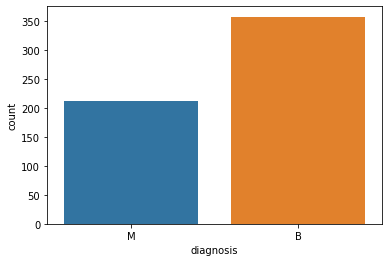

In [7]:
ax = sns.countplot(labels, label = "Count")
B, M = labels.value_counts()
print("Number of Benign Tumors", B)
print("Number of Malignant Tumors", M)

<p> Here we can see that there is a problem of <strong>class imbalance</strong> as Benign cases are more than Malignant cases. This might create error in our model</p>

In [8]:
features.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<p> We need to normalize the data </p>

In [9]:
features = (features - features.mean())/features.std()

<h2>Data Visualization</h2>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

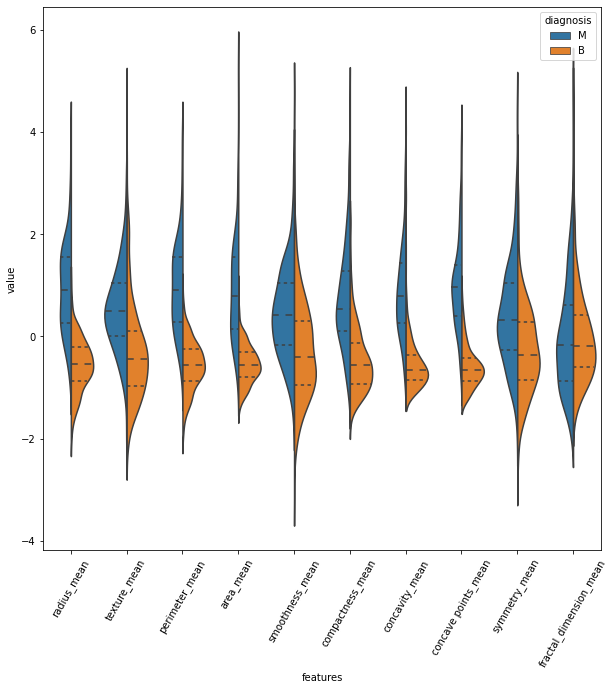

In [10]:
features_10 = pd.concat([labels, features.iloc[:, 0:10]], axis = 1)
features_10 = pd.melt(features_10, id_vars = 'diagnosis',var_name = 'features', value_name = 'value')
plt.figure(figsize = (10,10))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = features_10, split = True, inner = 'quart')
plt.xticks(rotation = 60)

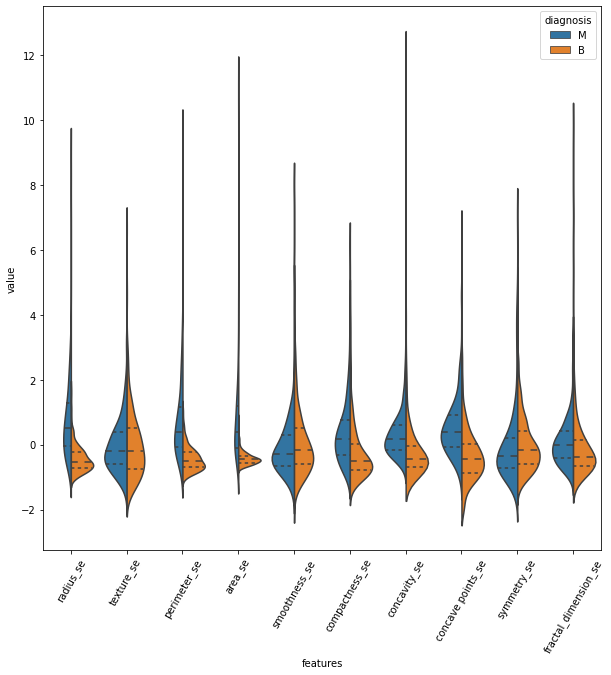

In [11]:
features_20 = pd.concat([labels, features.iloc[:, 10:20]], axis = 1)
features_20 = pd.melt(features_20, id_vars = 'diagnosis',var_name = 'features', value_name = 'value')
plt.figure(figsize = (10,10))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = features_20, split = True, inner = 'quart')
plt.xticks(rotation = 60);

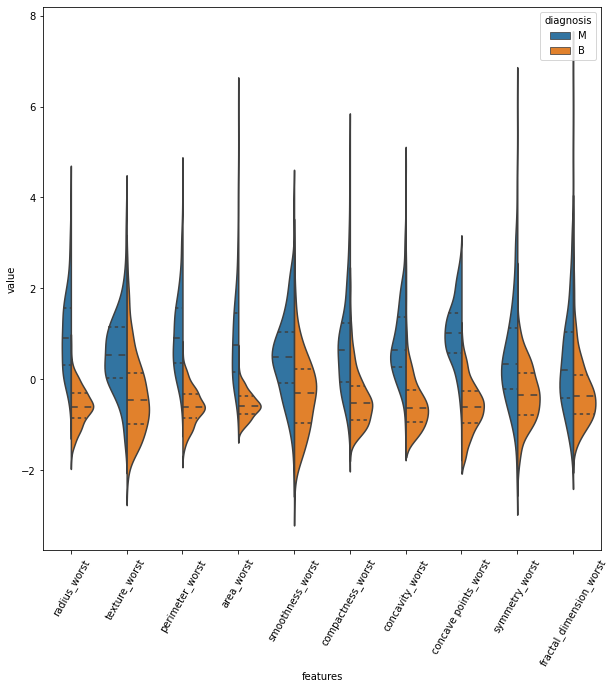

In [12]:
features_30 = pd.concat([labels, features.iloc[:, 20:30]], axis = 1)
features_30 = pd.melt(features_30, id_vars = 'diagnosis',var_name = 'features', value_name = 'value')
plt.figure(figsize = (10,10))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = features_30, split = True, inner = 'quart')
plt.xticks(rotation = 60);

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

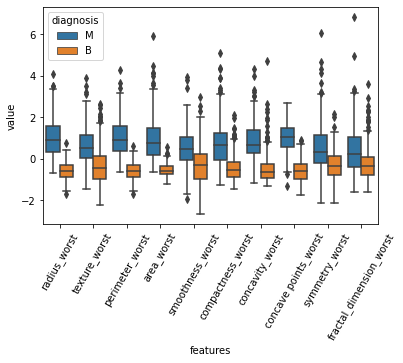

In [13]:
sns.boxplot(x = 'features', y = 'value', hue = 'diagnosis', data = features_30)
plt.xticks(rotation = 60)

<h2>Feature Comparision</h2>

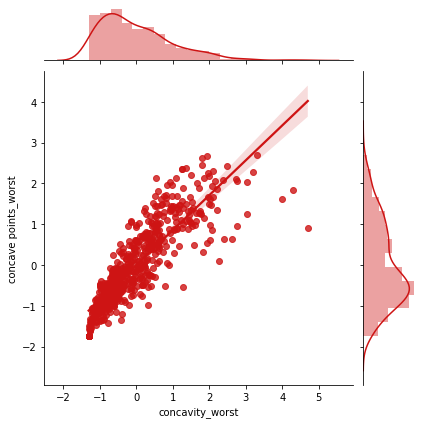

In [14]:
sns.jointplot(features.loc[:, 'concavity_worst'],
             features.loc[:,'concave points_worst'],
             kind = 'regg',
             color = '#ce1414')

<h2> Observing the Distribution of Values and their Variance with Swarm plots</h2>

In [15]:
sns.set(style = 'whitegrid', palette = 'muted')
features = (features - features.mean())/features.std()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

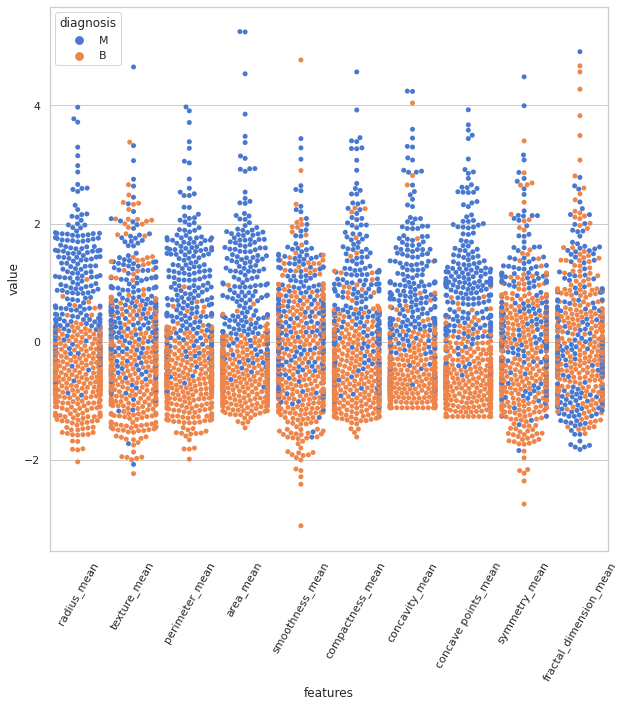

In [16]:
features_10 = pd.concat([labels, features.iloc[:, 0:10]], axis = 1)
features_10 = pd.melt(features_10, id_vars = 'diagnosis',var_name = 'features', value_name = 'value')
plt.figure(figsize = (10,10))
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data = features_10)
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

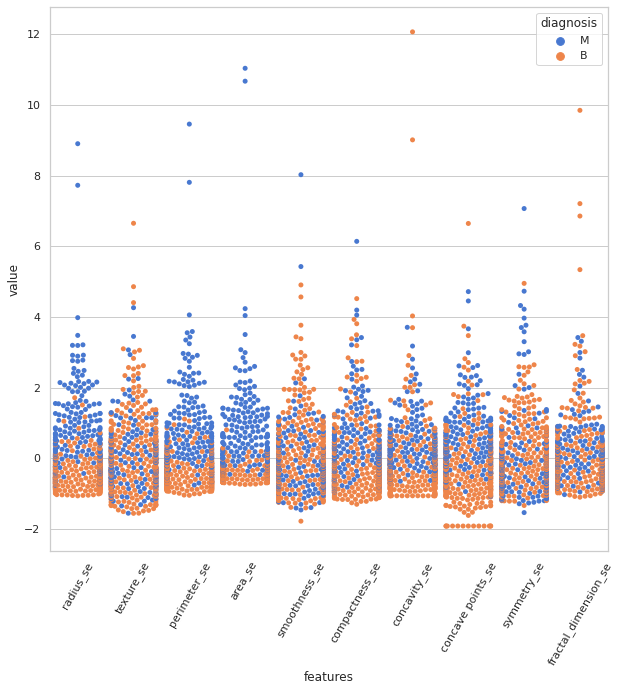

In [17]:
features_20 = pd.concat([labels, features.iloc[:, 10:20]], axis = 1)
features_20 = pd.melt(features_20, id_vars = 'diagnosis',var_name = 'features', value_name = 'value')
plt.figure(figsize = (10,10))
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data = features_20)
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

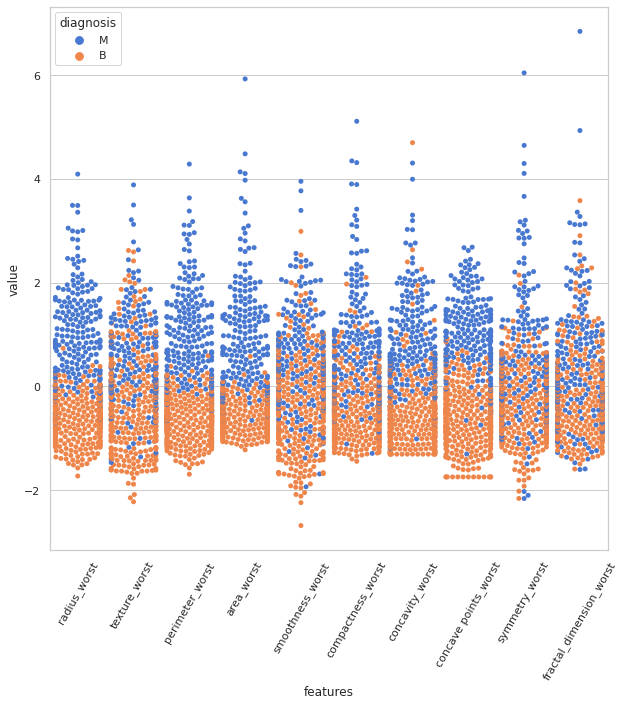

In [18]:
features_30 = pd.concat([labels, features.iloc[:, 20:30]], axis = 1)
features_30 = pd.melt(features_30, id_vars = 'diagnosis',var_name = 'features', value_name = 'value')
plt.figure(figsize = (10,10))
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data = features_30)
plt.xticks(rotation = 60)

<h2> Observing all Pair-wise Correlations and Dropping Columns</h2>

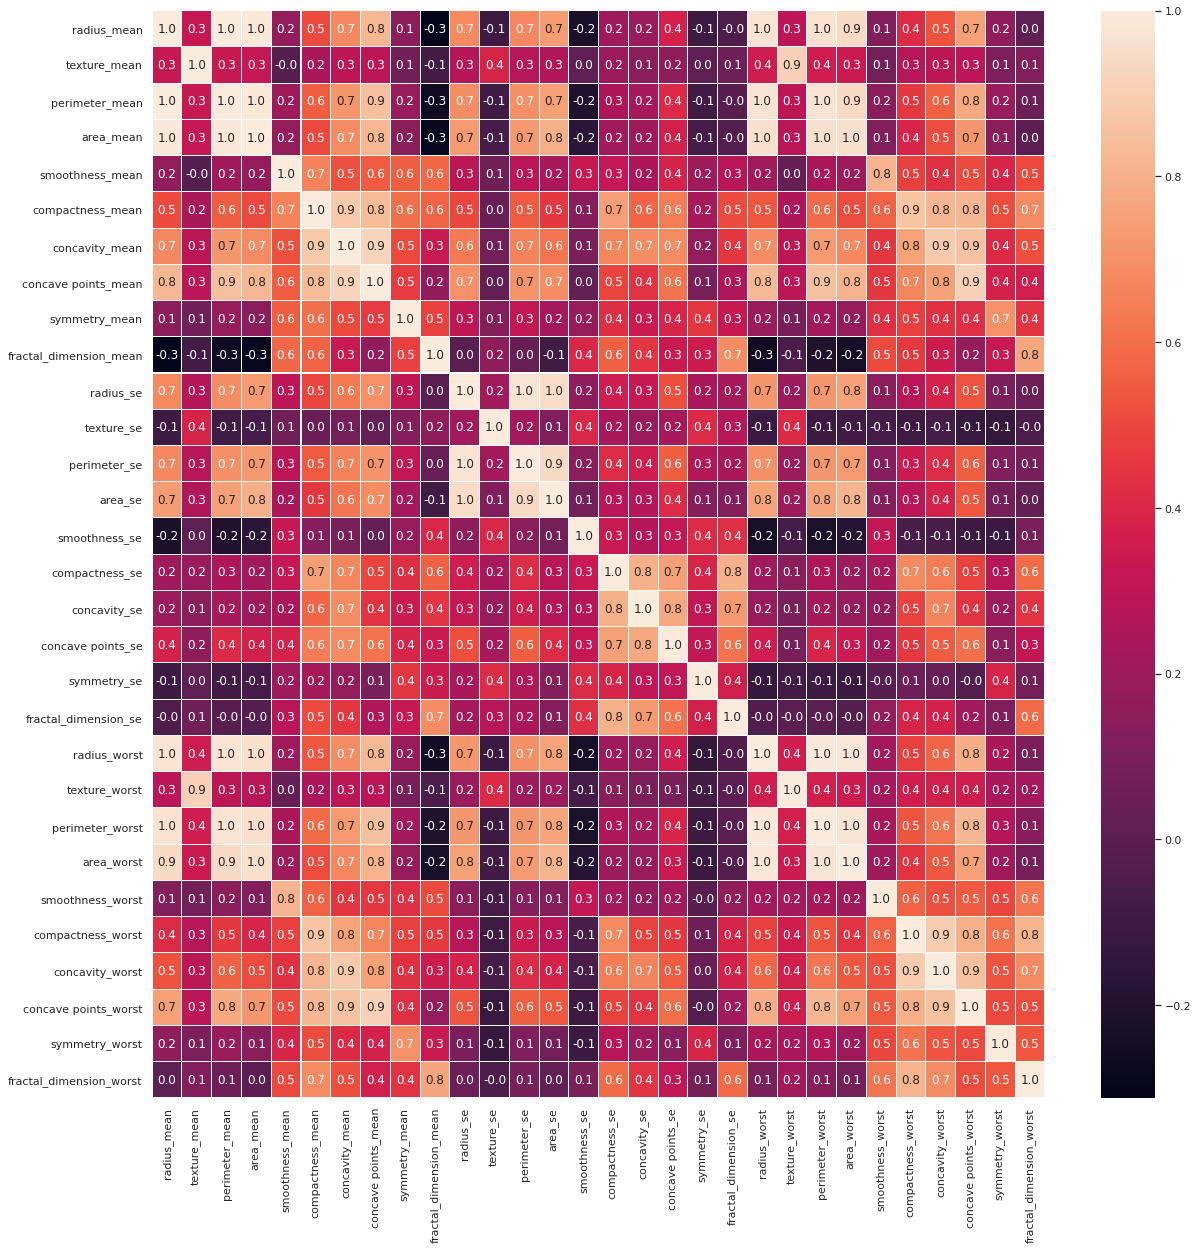

In [19]:
f , ax = plt.subplots(figsize = (20 , 20))
sns.heatmap(features.corr(), annot = True, linewidth = .01, fmt = '.1f', ax =ax)

In [20]:
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [21]:
drop_cols = ['perimeter_mean', 'radius_mean', 'compactness_mean',
               'concave points_mean', 'radius_se', 'perimeter_se', 'radius_worst',
               'perimeter_worst', 'compactness_worst', 'concave points_worst', 'compactness_worst',
               'concave points_worst', 'compactness_se', 'concave points_se', 'texture_worst', 'area_worst']

In [22]:
df = features.drop(drop_cols, axis = 1)
df.shape

(569, 16)

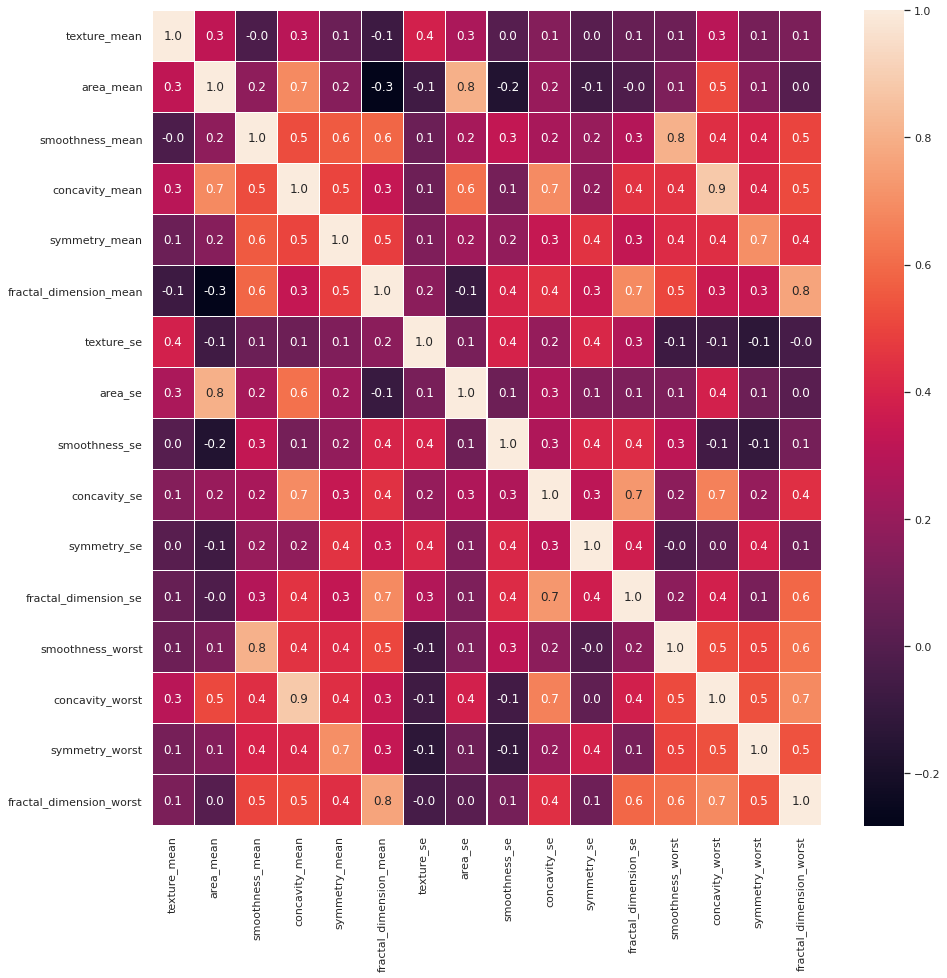

In [23]:
f , ax = plt.subplots(figsize = (15 , 15))
sns.heatmap(df.corr(), annot = True, linewidth = .01, fmt = '.1f', ax =ax)

<h1> Classification using XGBoost </h1>

In [62]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score

In [71]:
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size = 0.3, random_state = 42)

clf_1 = xgb.XGBClassifier(random_state = 42)
clf_1 = clf_1.fit(x_train, y_train)

Accuracy is : 0.9766081871345029


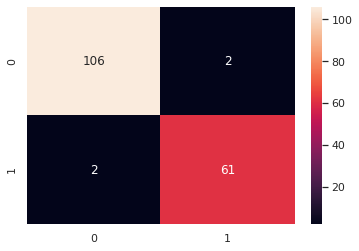

In [72]:
print("Accuracy is :", accuracy_score(y_test, clf_1.predict(x_test)))
cm = confusion_matrix(y_test, clf_1.predict(x_test))
sns.heatmap(cm, annot = True, fmt = 'd');

<h1> Univariate Feature Selection and XGBoost </h1>

In [73]:
from sklearn.feature_selection import SelectKBest, chi2

In [74]:
x_train_norm = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test_norm = (x_test - x_test.min())/(x_test.max() - x_test.min())

In [75]:
select_feature = SelectKBest(chi2, k = 10).fit(x_train_norm, y_train)

print("Score List:", select_feature.scores_)
print("Features List", x_train.columns)

Score List: [4.16160236e+00 2.12243535e+01 2.84378532e+00 3.05875468e+01
 2.96607585e+00 3.55897442e-02 1.76768697e-02 1.37480476e+01
 7.48359421e-02 1.74973919e+00 4.24848773e-02 1.20258365e-01
 5.00582782e+00 2.86537654e+01 4.33924794e+00 3.05882225e+00]
Features List Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [76]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

clf_2 = xgb.XGBClassifier(random_state = 42).fit(x_train_2, y_train)

print("Accuracy is ", accuracy_score(y_test, clf_2.predict(x_test_2)))

Accuracy is  0.9766081871345029


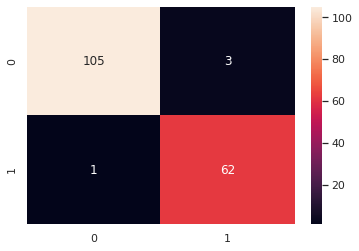

In [77]:
cm = confusion_matrix(y_test, clf_2.predict(x_test_2))
sns.heatmap(cm, annot = True, fmt = 'd');

<h1> Feature Extraction using Principal Component Analysis </h1>

In [60]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 42)
x_train_norm = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test_norm = (x_test - x_test.min())/(x_test.max() - x_test.min())

Text(0, 0.5, 'Cumulative explained variance')

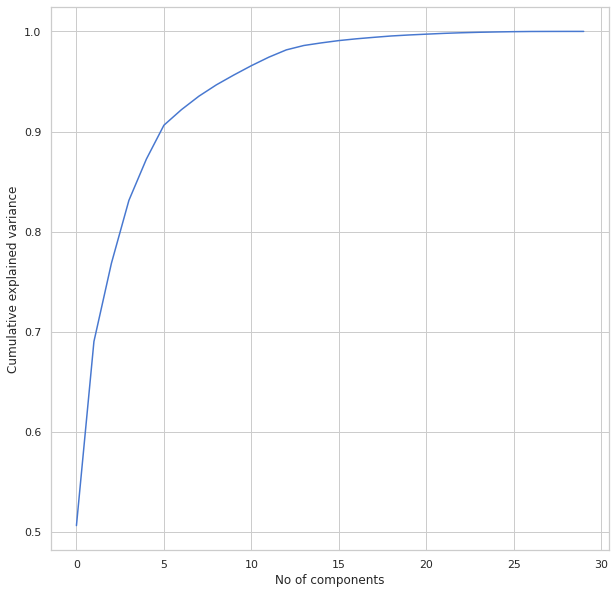

In [61]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_norm)

plt.figure(1, figsize = (10,10))
sns.lineplot(data = np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel('Cumulative explained variance')